In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
len(digits.target)

1797

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

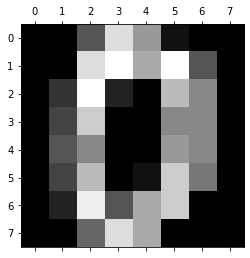

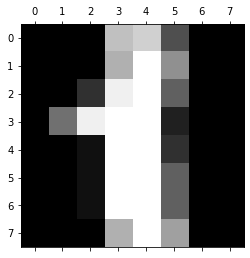

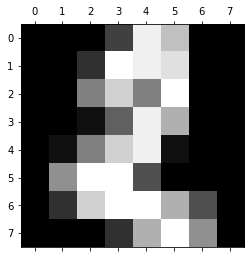

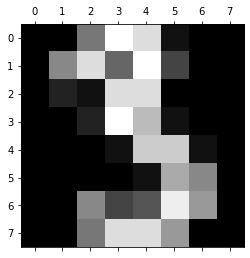

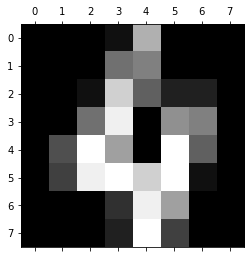

In [6]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
import pandas as pd
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

In [11]:
import seaborn as sns

In [12]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train , y_train)
    error.append(knn.score(X_test, y_test))

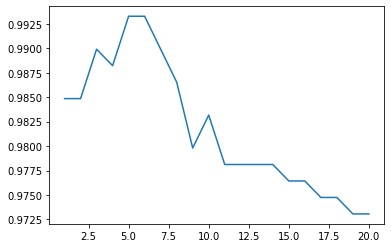

In [13]:
sns.lineplot(x=range(1,21), y=error)

In [14]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
model.score(X_test, y_test)

0.9932659932659933

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

Text(42.0, 0.5, 'Predicted')

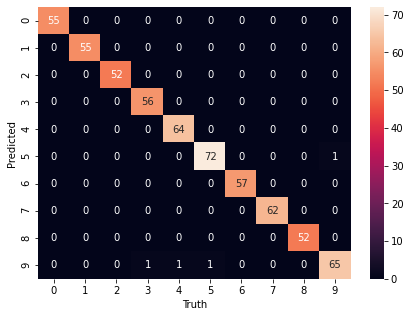

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True )
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        52
           3       0.98      1.00      0.99        56
           4       0.98      1.00      0.99        64
           5       0.99      0.99      0.99        73
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        62
           8       1.00      1.00      1.00        52
           9       0.98      0.96      0.97        68

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



# Testing out other models as well

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [31]:
model_params = {
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10, 100, 200]
        }
    },
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,2,3,5,10],
            'kernel':['rbf', 'linear']
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{}
    },
    'gaussian':{
        'model':GaussianNB(),
        'params':{}
    },
    'multinomial':{
        'model':MultinomialNB(),
        'params':{
            'alpha':[1.0,2.0,5.0]
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [5,7]
        }
    }
}

In [32]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [33]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.968420,{'n_estimators': 200}
1,svm,0.968399,"{'C': 1, 'kernel': 'linear'}"
2,decision_tree,0.826252,{}
3,gaussian,0.810505,{}
4,multinomial,0.904388,{'alpha': 1.0}
5,knn,0.976715,{'n_neighbors': 5}
